# Detection

In [1]:
import os
import sys
import pandas as pd
import pickle

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.utils.audio_to_spectrograms import *

PATH = '../data/detection'

In [2]:
# One time download to local
"""
from huggingface_hub import snapshot_download
repo_id = "kuross/dl-proj-detection"
snapshot_download(repo_id, repo_type='dataset', local_dir = PATH)"""

'\nfrom huggingface_hub import snapshot_download\nrepo_id = "kuross/dl-proj-detection"\nsnapshot_download(repo_id, repo_type=\'dataset\', local_dir = PATH)'

In [3]:
# get files
wav_files = os.listdir(PATH)
wav_files = [i for i in wav_files if i.endswith('.wav')]
wav_files.sort()

annotations = pd.read_csv(PATH + '/annotations.csv').sort_values(by = 'filename').reset_index(drop = True)
annotations['filename'] = annotations['filename'].str[6:] 
annot_filter = annotations.query(f'onset != 0')
assert (annot_filter['filename'] == wav_files).all(), "Available files and annotation.csv filenames do not add up"

In [4]:
# event count breakdown
annot_filter['event_label'].value_counts()

event_label
cough       53
gun_shot    52
dog_bark    48
siren       47
Name: count, dtype: int64

In [5]:
# bg count breakdown
annotations.query(f'onset == 0')['event_label'].value_counts()

event_label
forest         56
coffee_shop    50
airport        48
traffic        46
Name: count, dtype: int64

In [6]:
S_db_all = []
sr = 44100
for file in wav_files:
    S_db = get_mel_spec(file, PATH, sr)
    S_db_all.append(S_db)

In [7]:
annot_filter.iloc[49]

filename       scene_0049.wav
onset                2.997709
offset                4.57985
event_label          gun_shot
Name: 99, dtype: object

In [8]:
export = {'sr':sr, 
          'S_db': S_db_all, 
          'files': wav_files, 
          'onset':np.array(annot_filter['onset']), 
          'offset':np.array(annot_filter['offset']), 
          'event_label':np.array(annot_filter['event_label']),
          'background_label':np.array(annotations.query(f'onset == 0')['event_label']),
          }

pickle.dump(export, open('../data/processed/detection.p', 'wb'))

20: dog_bark in forest


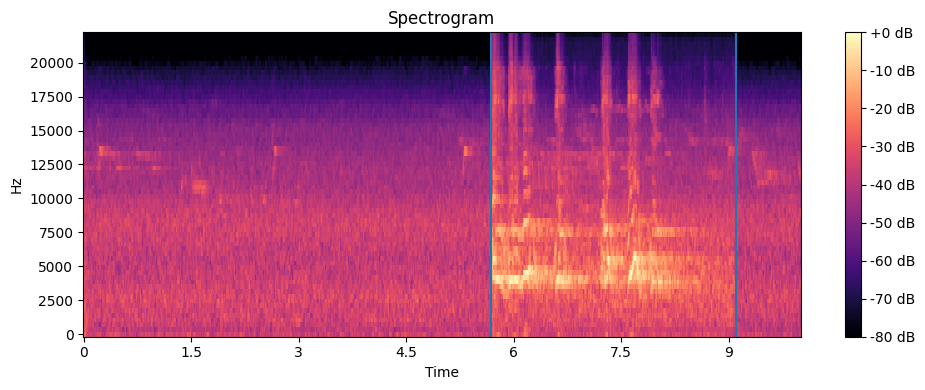

21: siren in airport


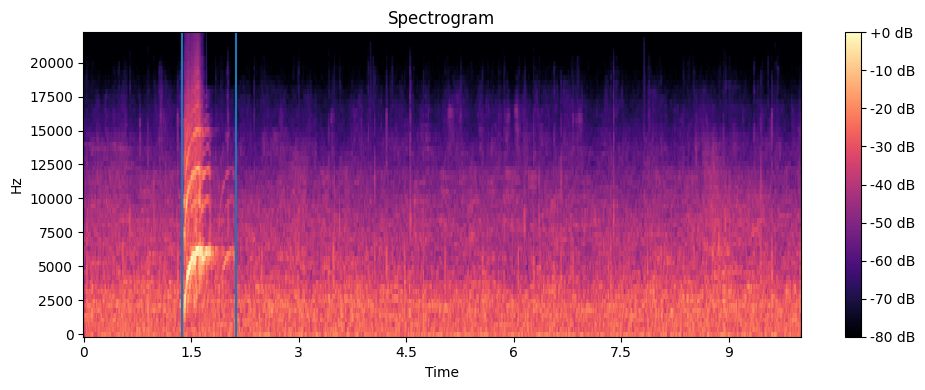

22: siren in airport


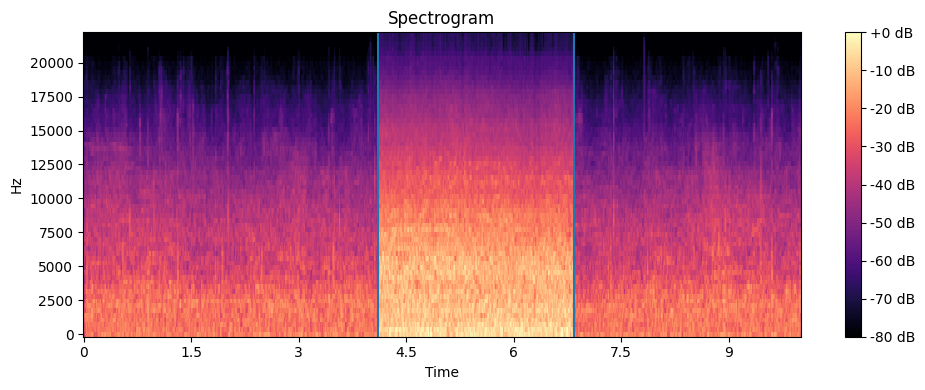

23: siren in forest


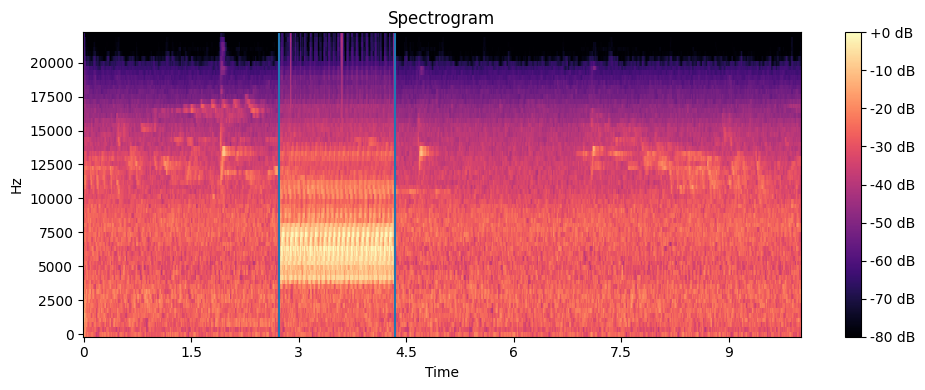

24: siren in airport


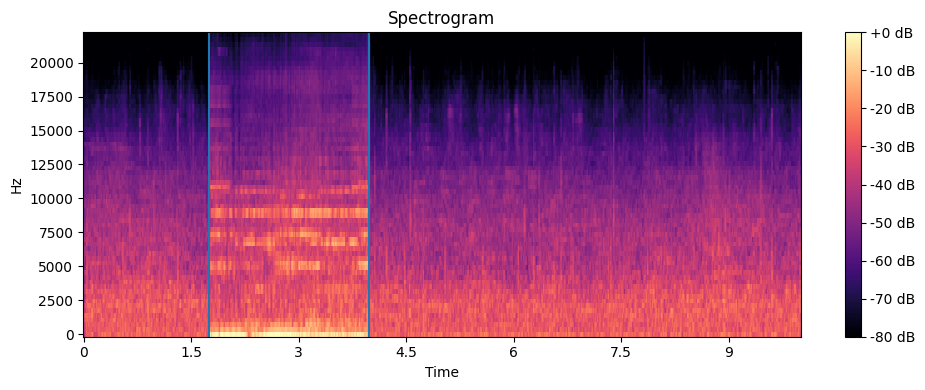

25: gun_shot in traffic


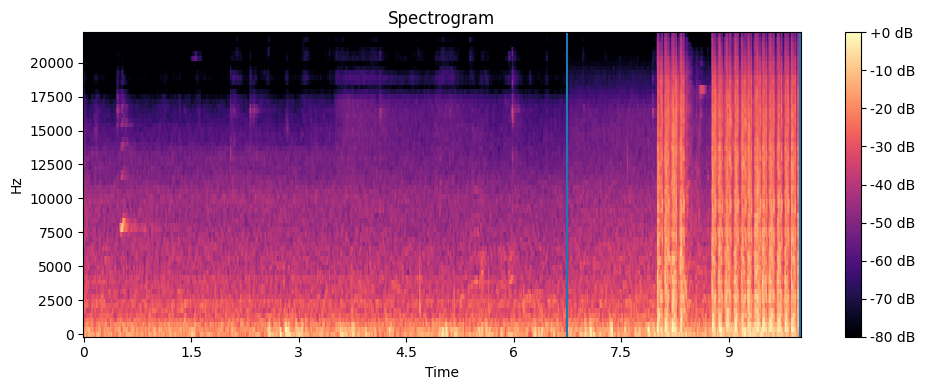

26: siren in traffic


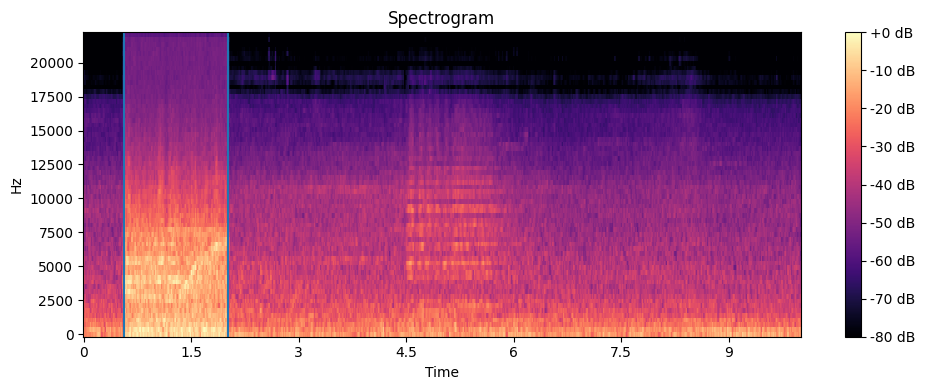

27: dog_bark in forest


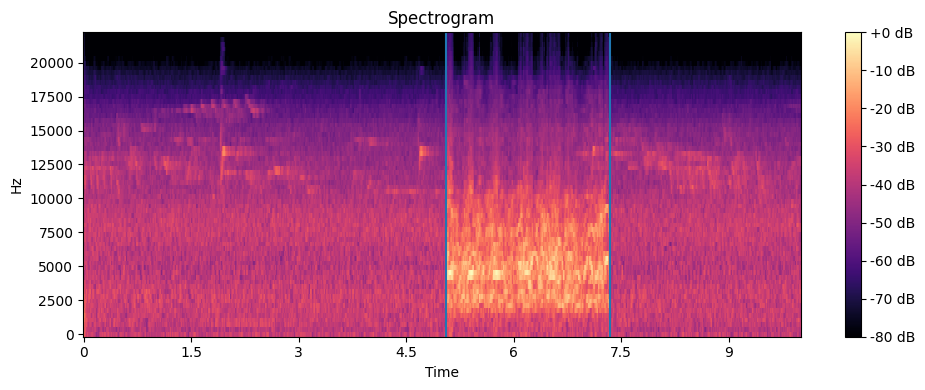

28: gun_shot in forest


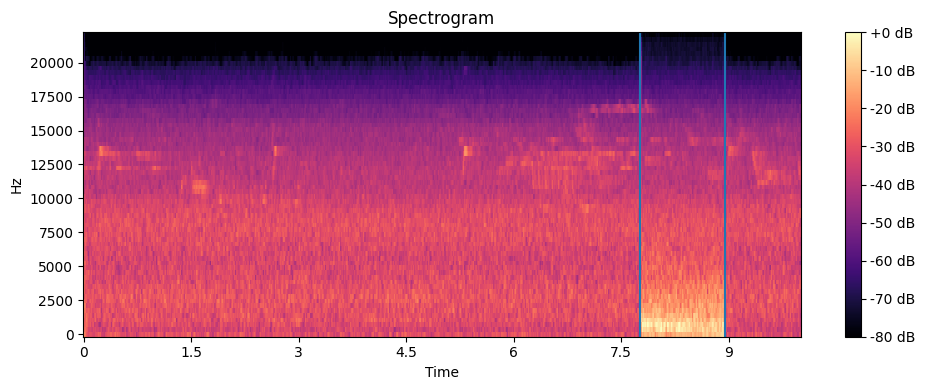

29: siren in traffic


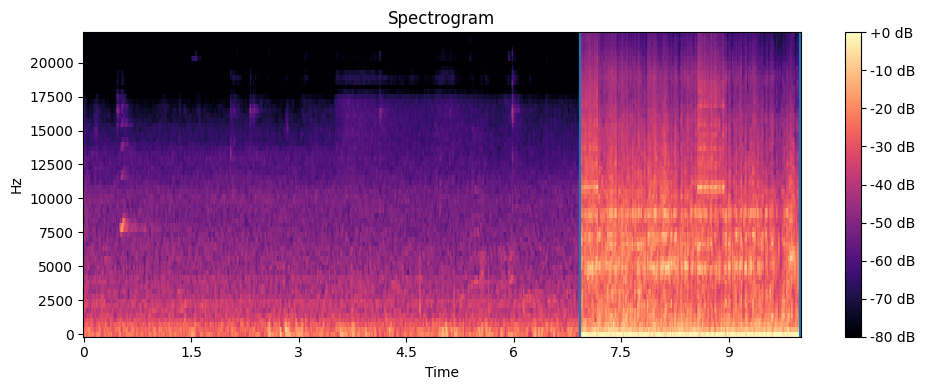

30: gun_shot in airport


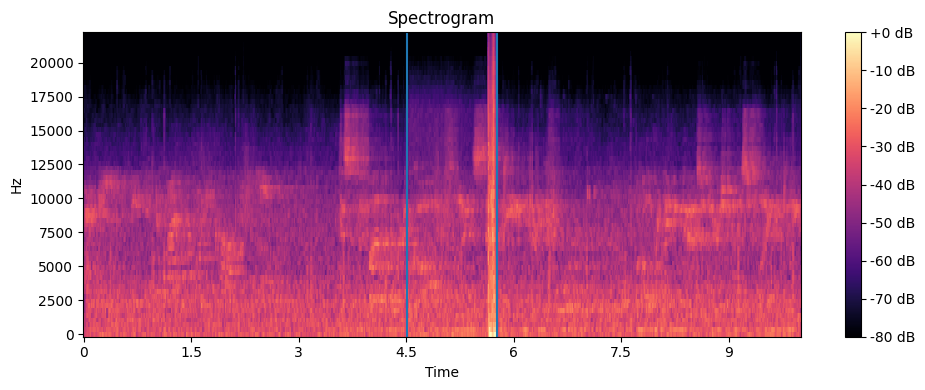

31: gun_shot in forest


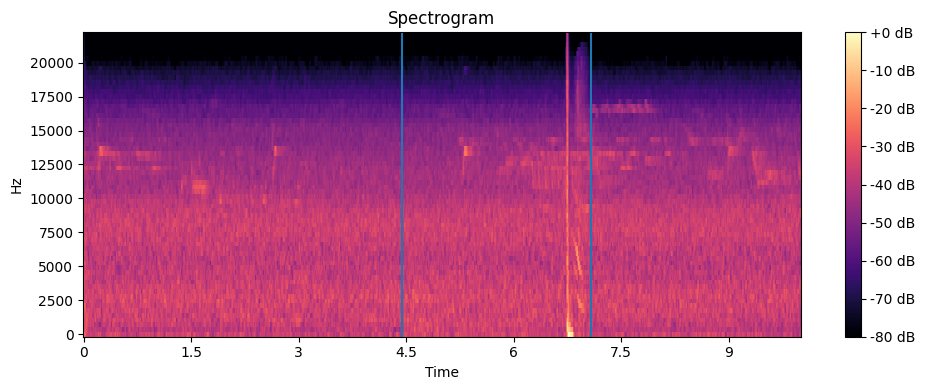

32: dog_bark in forest


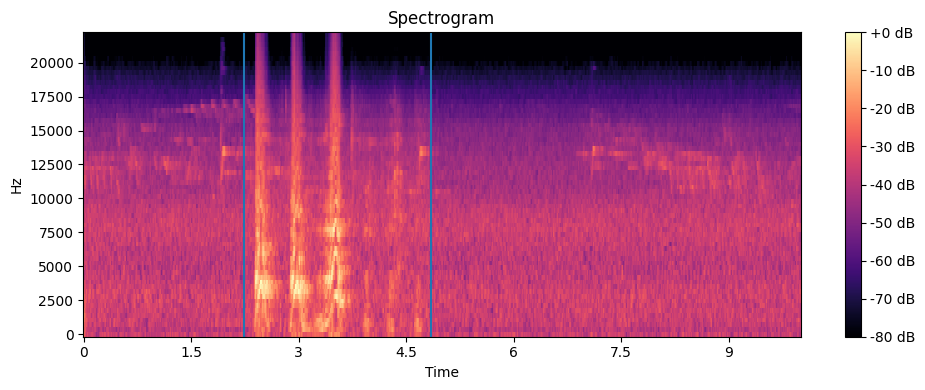

33: siren in airport


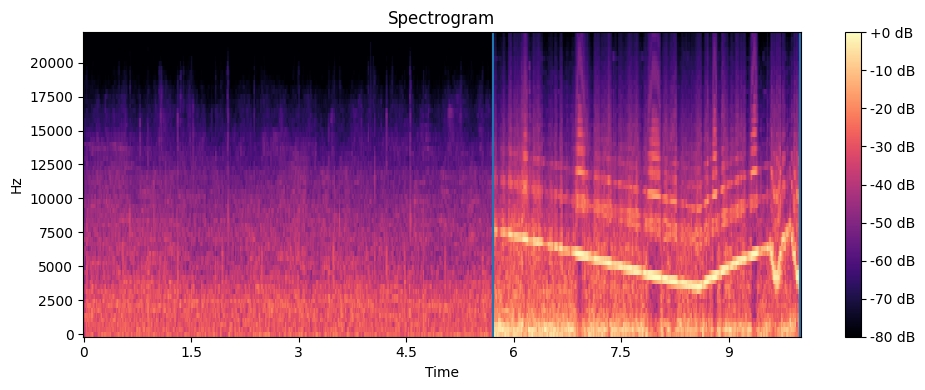

34: siren in coffee_shop


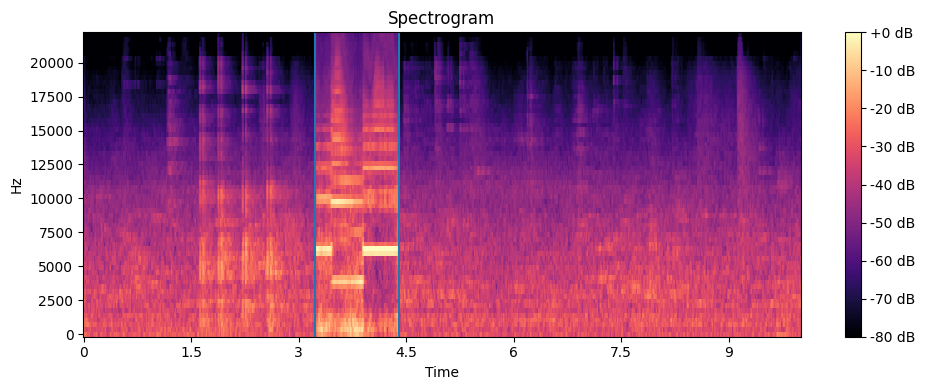

35: cough in traffic


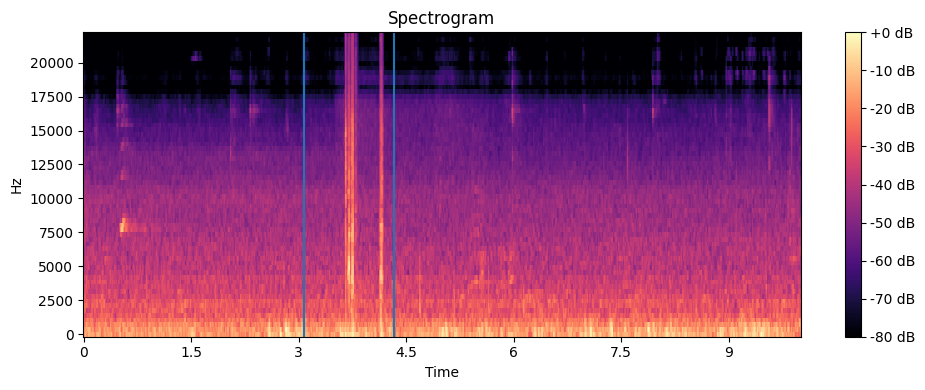

36: gun_shot in coffee_shop


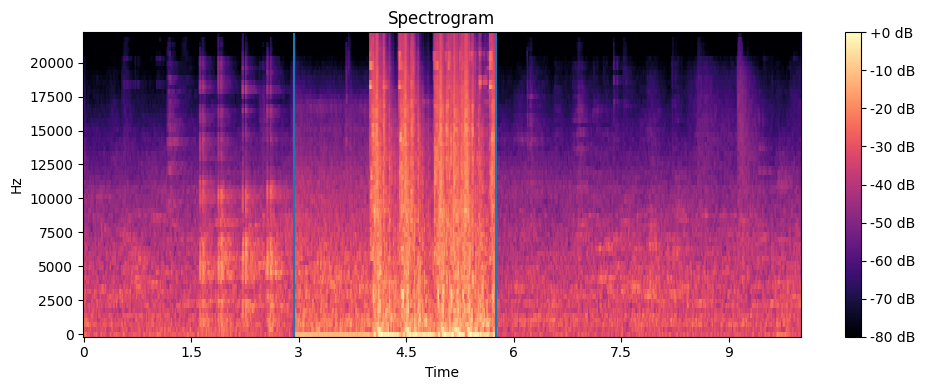

37: gun_shot in traffic


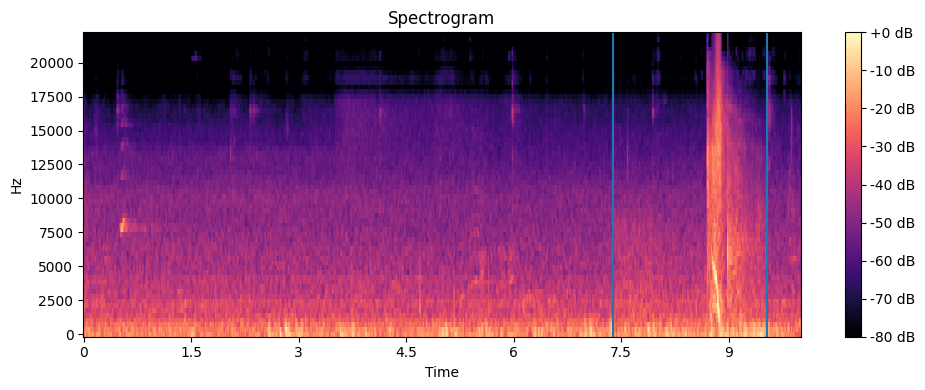

38: gun_shot in traffic


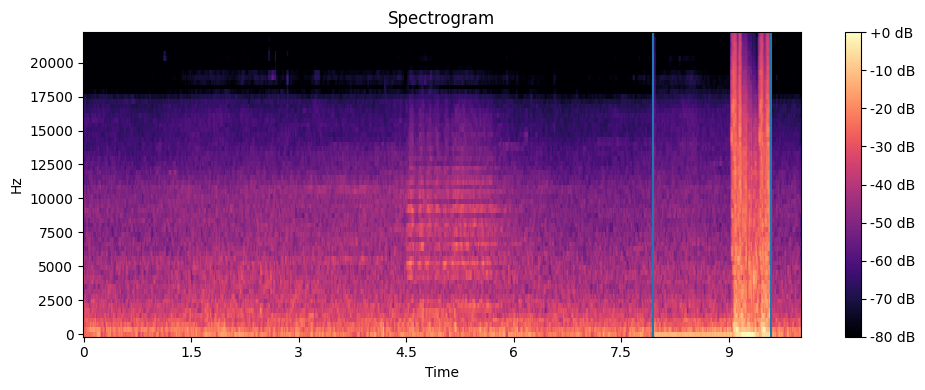

39: cough in traffic


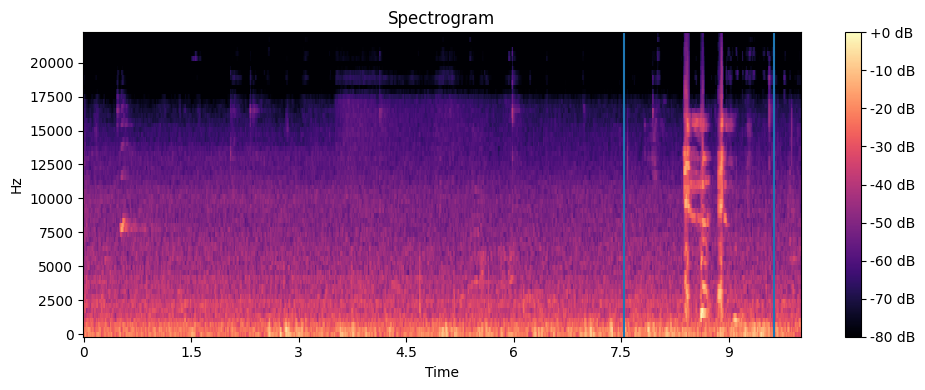

In [11]:
# Quick spectrogram vis
#for i in np.random.randint(0, 200, 5):
for i in range(20, 40):
    print(f'{i}: {export['event_label'][i]} in {export['background_label'][i]}')
    annot_file = annot_filter.query(f'filename == "scene_0{str(i).zfill(3)}.wav"')
    offset = annot_file['offset'].iloc[0]
    onset = annot_file['onset'].iloc[0]
    display_spectrogram(S_db_all[i], sr, onset, offset)